In [1]:
pip install haversine

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import haversine as hs

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))
print(check_output(["ls", "./"]).decode("utf8")) 

prediction.csv
sample_data
sample_submission.csv
test.csv
train.csv



In [15]:
data = pd.read_csv('./train.csv')
# data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17176 entries, 0 to 17175
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tripid                     17176 non-null  int64  
 1   additional_fare            16974 non-null  float64
 2   duration                   16974 non-null  float64
 3   meter_waiting              16974 non-null  float64
 4   meter_waiting_fare         16974 non-null  float64
 5   meter_waiting_till_pickup  16974 non-null  float64
 6   pickup_time                17176 non-null  object 
 7   drop_time                  17176 non-null  object 
 8   pick_lat                   17176 non-null  float64
 9   pick_lon                   17176 non-null  float64
 10  drop_lat                   17176 non-null  float64
 11  drop_lon                   17176 non-null  float64
 12  fare                       17039 non-null  float64
 13  label                      17176 non-null  obj

In [16]:
data.isnull().sum()

tripid                         0
additional_fare              202
duration                     202
meter_waiting                202
meter_waiting_fare           202
meter_waiting_till_pickup    202
pickup_time                    0
drop_time                      0
pick_lat                       0
pick_lon                       0
drop_lat                       0
drop_lon                       0
fare                         137
label                          0
dtype: int64

In [17]:
from datetime import datetime

durations = []
for row in data.iterrows():
  rec = row[1]
  duration = rec['duration']
  if np.isnan(duration):
    drop_time = datetime.strptime(rec['drop_time'], '%m/%d/%Y %H:%M')
    pickup_time = datetime.strptime(rec['pickup_time'], '%m/%d/%Y %H:%M')
    time_diff = drop_time - pickup_time
    duration = time_diff.total_seconds()
  durations.append(duration)
data['duration'] = pd.Series(durations)

def calc_mean(df, column_name):
  return round(df[column_name].mean(), 3)

def calc_mode(df, column_name):
  col_mode = df[column_name].mode()
  return col_mode[0]

values = {'additional_fare': calc_mean(data, 'additional_fare'),
          'meter_waiting': calc_mean(data, 'meter_waiting'), 
          'meter_waiting_fare': calc_mean(data, 'meter_waiting_fare'), 
          'meter_waiting_till_pickup': calc_mean(data, 'meter_waiting_till_pickup'), 
          'fare': calc_mean(data, 'fare')}
          
data.fillna(value=values, inplace=True)
data.isnull().sum()
# data.head(10)

tripid                       0
additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
pickup_time                  0
drop_time                    0
pick_lat                     0
pick_lon                     0
drop_lat                     0
drop_lon                     0
fare                         0
label                        0
dtype: int64

In [ ]:
# print(data['additional_fare'].mean(), data['additional_fare'].median(), data['additional_fare'].mode())

In [18]:
distance = []
for row in data.iterrows():
  record = row[1]
  pick_loc = (record.pick_lat, record.pick_lon)
  drop_loc = (record.drop_lat, record.drop_lon)
  distance.append(hs.haversine(pick_loc, drop_loc))
data['distance'] = pd.Series(distance)

mapping = {'correct': 1, 'incorrect': 0}
data = data.replace({'label': mapping})

train_y = data.label

list = ['tripid', 'pickup_time', 'drop_time', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'label']
train_x = data.drop(list, axis=1)
train_x.head(10)

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,distance
0,10.50,834.0,56.000,0.0000,64.000,270.32,5.092777
1,10.50,791.0,47.000,0.0000,134.000,197.85,3.168062
2,10.50,1087.0,80.000,0.0000,61.000,301.64,6.305404
3,10.50,598.0,271.000,15.6638,68.000,82.30,0.861947
4,13.72,1020.0,629.074,32.0580,112.467,358.39,8.147793
5,10.50,3407.0,182.000,0.0000,112.000,1065.02,24.207073
6,10.50,1246.0,487.000,0.0000,133.000,266.62,4.777630
7,10.50,1333.0,295.000,17.1985,212.000,318.05,5.322551
8,10.50,360.0,80.000,4.6640,3.000,100.32,1.035303
9,10.50,1539.0,588.000,33.9864,43.000,257.89,2.930719


In [19]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17176 entries, 0 to 17175
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            17176 non-null  float64
 1   duration                   17176 non-null  float64
 2   meter_waiting              17176 non-null  float64
 3   meter_waiting_fare         17176 non-null  float64
 4   meter_waiting_till_pickup  17176 non-null  float64
 5   fare                       17176 non-null  float64
 6   distance                   17176 non-null  float64
dtypes: float64(7)
memory usage: 939.4 KB


correct:  15495
incorrect:  1681


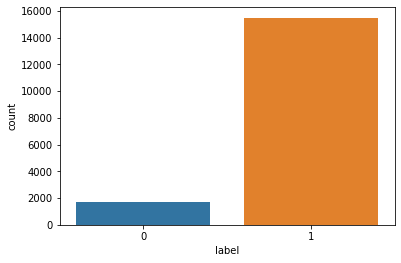

In [20]:
ax = sns.countplot(train_y, label="Count")
correct, incorrect = train_y.value_counts()
print("correct: ", correct)
print("incorrect: ", incorrect)

In [21]:
train_x.describe()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,distance
count,17176.000000,17176.000000,17176.000000,17176.000000,17176.000000,17176.000000,17176.000000
mean,13.719655,1713.634898,629.074228,32.057670,112.466834,312.655463,4.858268
std,98.391294,8101.696673,8015.703284,462.738135,439.447558,602.881578,43.015910
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.500000,547.000000,33.000000,0.000000,26.000000,125.960000,1.486164
50%,10.500000,1012.000000,128.000000,0.233200,74.000000,213.010000,3.218387
75%,10.500000,1808.000000,367.000000,15.317000,143.000000,364.315000,6.161054
max,12795.030000,453872.000000,453650.000000,26198.601400,51288.000000,26945.990000,5609.529188


In [ ]:
# data_y = train_y
# data_x = train_x

# data_n_2 =  (data_x - data_x.mean()) / (data_x.std()) # standardization
# data_x = pd.concat([train_y, data_n_2], axis=1)
# data_x = pd.melt(data_x, id_vars="label", var_name="features", value_name="value")
# plt.figure(figsize=(10,10))
# sns.violinplot(x="features", y="value", hue="label", data=data_x, split=True, inner="quart")
# plt.xticks(rotation=90)

In [ ]:
# sns.set(style="whitegrid", palette="muted")
# data_y = train_y
# data_x = train_x

# data_n_2 = (data_x - data_x.mean()) /(data_x.std()) # standardization
# data_x = pd.concat([train_y, data_n_2], axis=1)
# data_x = pd.melt(data_x, id_vars="label", var_name="features", value_name="value")
# plt.figure(figsize=(10,10))
# # tic = time.time()
# sns.swarmplot(x="features", y="value", hue="label", data=data_x)
# plt.xticks(rotation=90)

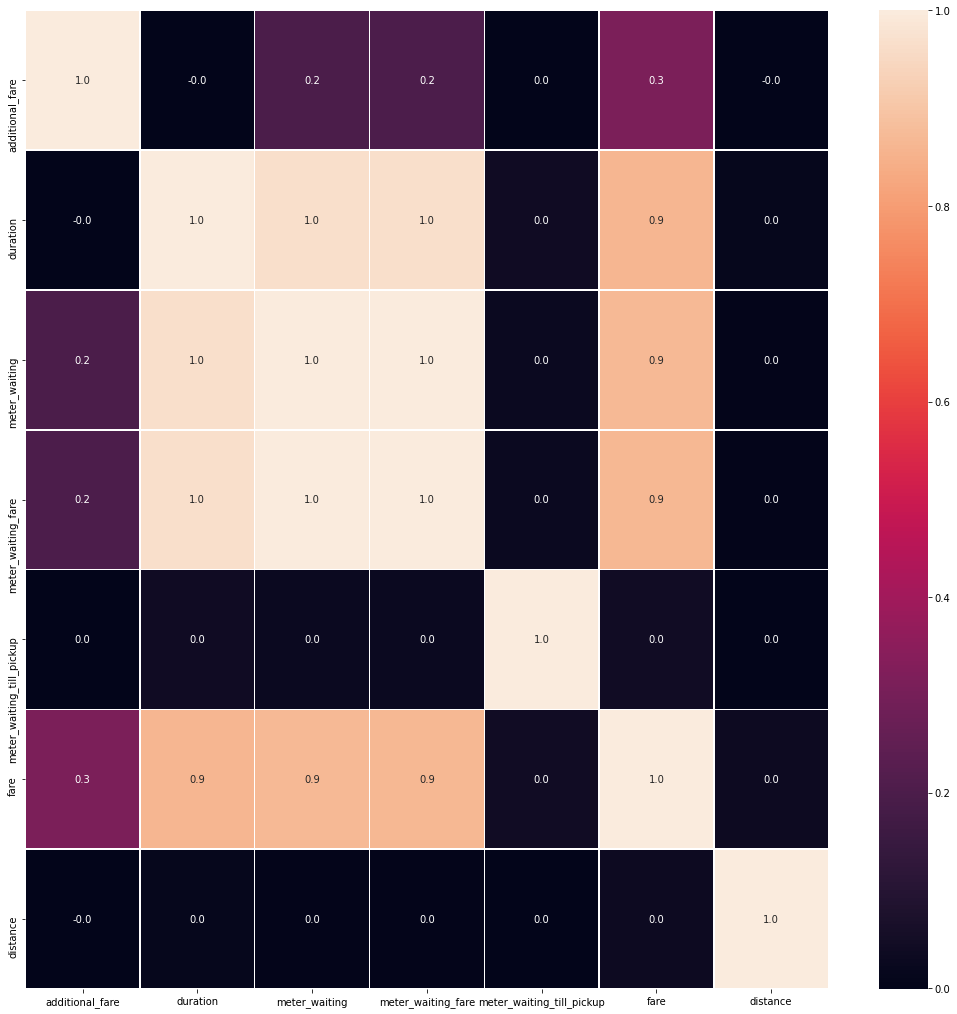

In [22]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(train_x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [11]:
drop_list = ['meter_waiting_fare']
train_x = train_x.drop(drop_list,axis = 1 )        # do not modify x, we will use it later 
train_x.head()

,additional_fare,duration,meter_waiting,meter_waiting_till_pickup,fare,distance
0,10.5,834.0,56.0,64.0,270.32,5.092777
1,10.5,791.0,47.0,134.0,197.85,3.168062
2,10.5,1087.0,80.0,61.0,301.64,6.305404
3,10.5,598.0,271.0,68.0,82.30,0.861947
4,0.0,1020.0,0.0,0.0,358.39,8.147793


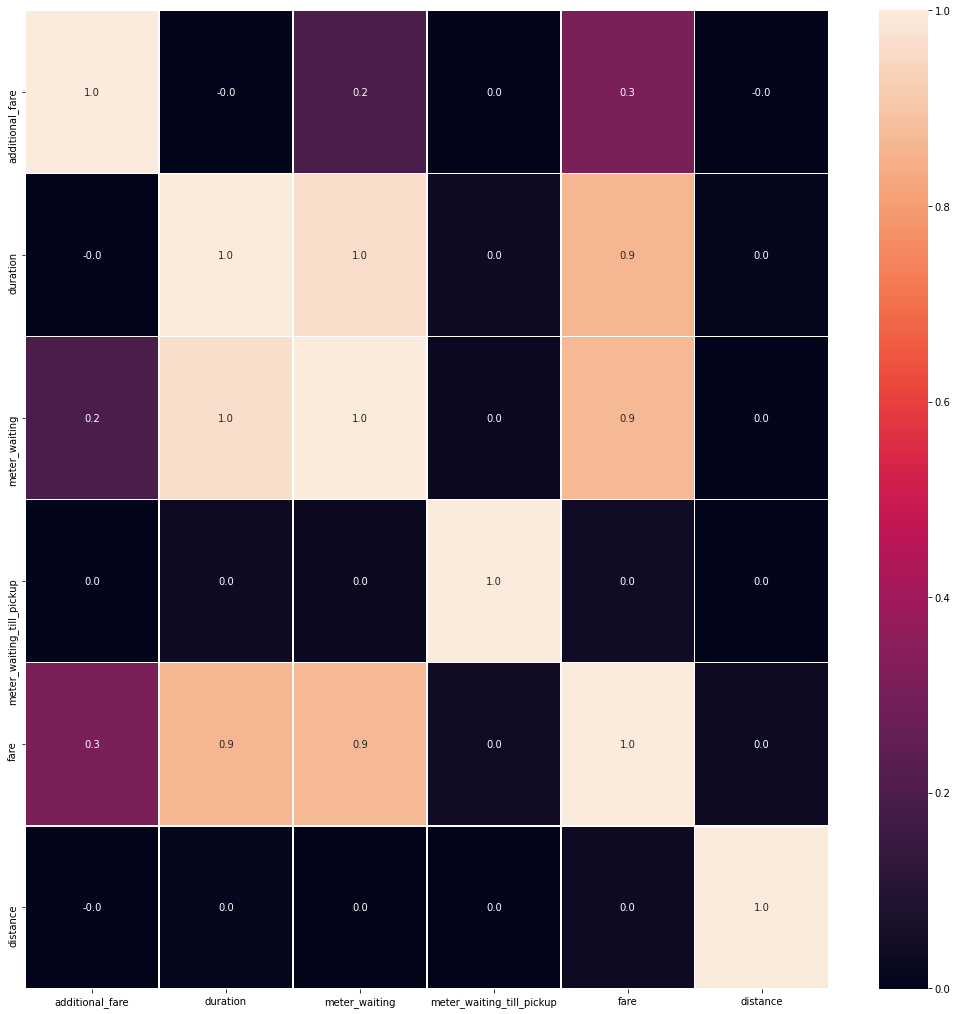

In [12]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(train_x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [13]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import f1_score,confusion_matrix
# from sklearn.metrics import accuracy_score

# # # split data train 70 % and test 30 %
# # x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=42)

# #random forest classifier with n_estimators=10 (default)
# clf_rf = RandomForestClassifier(random_state=43)      
# clr_rf = clf_rf.fit(train_x,train_y)

# # ac = accuracy_score(y_test,clf_rf.predict(x_test))
# # print('Accuracy is: ',ac)
# # cm = confusion_matrix(y_test,clf_rf.predict(x_test))
# # sns.heatmap(cm,annot=True,fmt="d")

In [27]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_2 = RandomForestClassifier()
rfecv = RFECV(estimator=clf_rf_2, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(train_x, train_y)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', train_x.columns[rfecv.support_])

Optimal number of features : 4
Best features : Index(['duration', 'meter_waiting', 'fare', 'distance'], dtype='object')


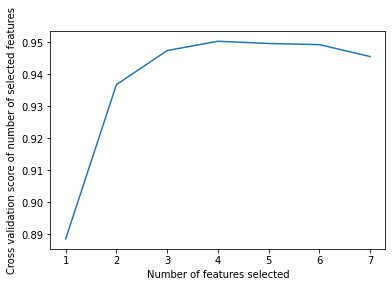

In [28]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [29]:
test_x = pd.read_csv("./test.csv")

distance = []
for row in test_x.iterrows():
  record = row[1]
  pick_loc = (record.pick_lat, record.pick_lon)
  drop_loc = (record.drop_lat, record.drop_lon)
  # print(hs.haversine(pick_loc, drop_loc))
  distance.append(hs.haversine(pick_loc, drop_loc))
test_x['distance'] = pd.Series(distance)

# drop_list2 = ['tripid', 'meter_waiting_fare', 'pickup_time', 'drop_time', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon']
drop_list2 = ['tripid', 'pickup_time', 'drop_time', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon']
test_x = test_x.drop(drop_list2, axis=1)

# pred_y = clr_rf.predict(test_x)
pred_y = rfecv.predict(test_x)

pred_result = pd.read_csv("sample_submission.csv")
pred_result["prediction"] = pred_y

pred_result.to_csv("prediction.csv", index=False)
